## Exploratory Data Analysis on the
Automobile Dataset
Report


In [7]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

In [9]:
#  Initial Data Check
"""
We check the structure of the data including data types, null values, and basic statistics.
"""
print("Initial shape:", df.shape)
df.info()
df.describe(include='all')

Initial shape: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  e

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [10]:
#  Replace '?' with NaN and Drop Missing Values
"""
Missing values are represented with '?'.
We'll replace those with np.nan and drop any rows that still contain null values.
"""
df.replace('?', np.nan, inplace=True)
print("Missing values before drop:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("Missing values after drop:")
print(df.isnull().sum())

Missing values before drop:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
Missing values after drop:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weig

In [11]:
# Remove Duplicates
"""
Duplicates can distort our analysis. We drop any duplicate rows.
"""
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (159, 26)


In [12]:
# Convert Columns to Correct Data Types
"""
We convert columns to their appropriate numeric types for accurate calculations and plotting.
"""
cols_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col])

In [13]:
# Summary Statistics
"""
We display summary statistics of the cleaned numeric columns.
"""
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(df[numeric_cols].describe())

        symboling  normalized-losses  wheel-base      length       width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     0.735849         121.132075   98.264151  172.413836   65.607547   
std      1.193086          35.651285    5.167416   11.523177    1.947883   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.650000   64.000000   
50%      1.000000         113.000000   96.900000  172.400000   65.400000   
75%      2.000000         148.000000  100.800000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400000  1488.000000 


Correlation Heatmap:
This heatmap shows the correlation between numeric features.
It helps in identifying relationships between variables like engine-size and price.



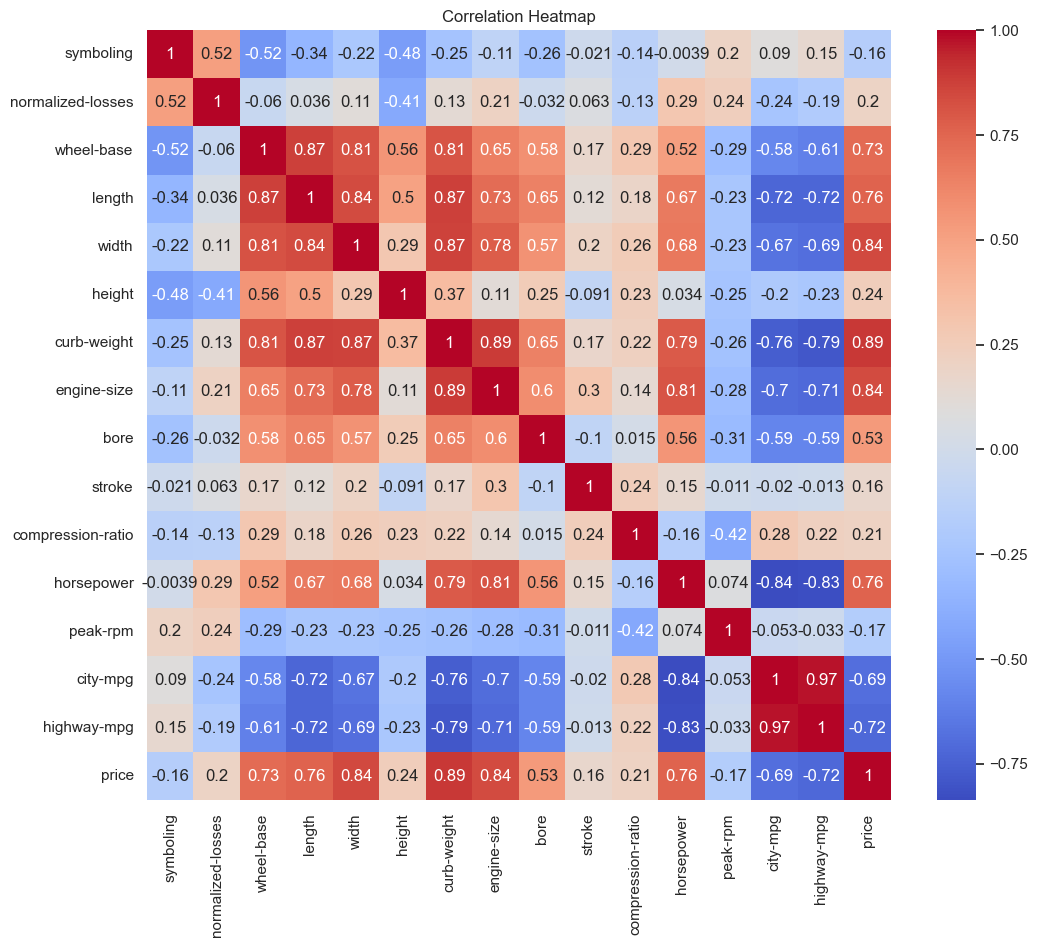

In [14]:
print("""
Correlation Heatmap:
This heatmap shows the correlation between numeric features.
It helps in identifying relationships between variables like engine-size and price.
""")

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


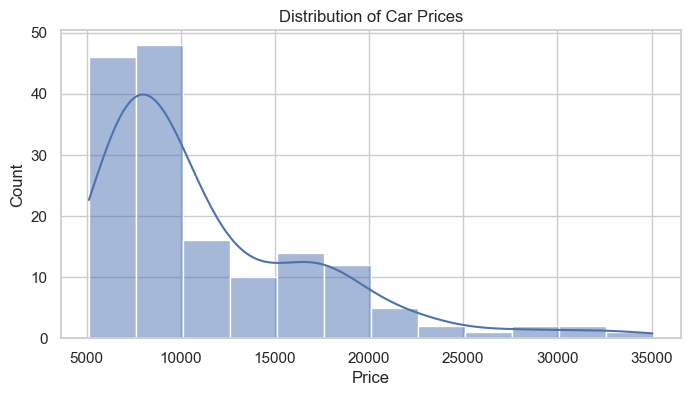

In [15]:
# Price Distribution
"""
We explore how automobile prices are distributed.
"""
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.show()

In [2]:
# Price vs. Horsepower
"""
We examine how horsepower impacts price.
"""
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='horsepower', y='price', hue='fuel-type')
plt.title("Price vs. Horsepower")
plt.show()

NameError: name 'plt' is not defined

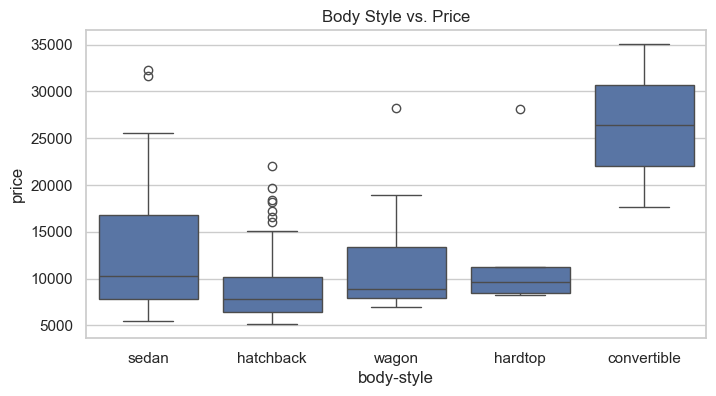

In [17]:
# Boxplot - Body Style vs. Price
"""
We look at the distribution of car prices across different body styles.
"""
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='body-style', y='price')
plt.title("Body Style vs. Price")
plt.show()

This report was written by : Rahab Modiba